In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Display settings
pd.set_option("display.max_colwidth", 500)


In [2]:
# Load the CFPB complaints dataset
df = pd.read_csv("../data/raw/complaints.csv", dtype={'Consumer disputed?': str})
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in the complaint,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [3]:
# Dataset shape
print("Dataset shape:", df.shape)

# Data types and missing values
df.info()

# Column names
df.columns


Dataset shape: (9609797, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), 

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
# Fraction of complaints without a narrative
missing_narratives_pct = df['Consumer complaint narrative'].isna().mean() * 100
print(f"Percentage of missing narratives: {missing_narratives_pct:.2f}%")


Percentage of missing narratives: 68.98%


In [5]:
# Keep only the target products
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

df = df[df['Product'].isin(target_products)]
print("Shape after filtering products:", df.shape)


Shape after filtering products: (226686, 18)


In [6]:
df = df[df['Consumer complaint narrative'].notna()]
print("Shape after removing empty narratives:", df.shape)


Shape after removing empty narratives: (80667, 18)


In [7]:
# Word count per complaint
df['word_count'] = df['Consumer complaint narrative'].str.split().str.len()

# Summary statistics
df['word_count'].describe()


count    80667.000000
mean       199.791674
std        223.183087
min          2.000000
25%         63.000000
50%        141.000000
75%        260.000000
max       6469.000000
Name: word_count, dtype: float64

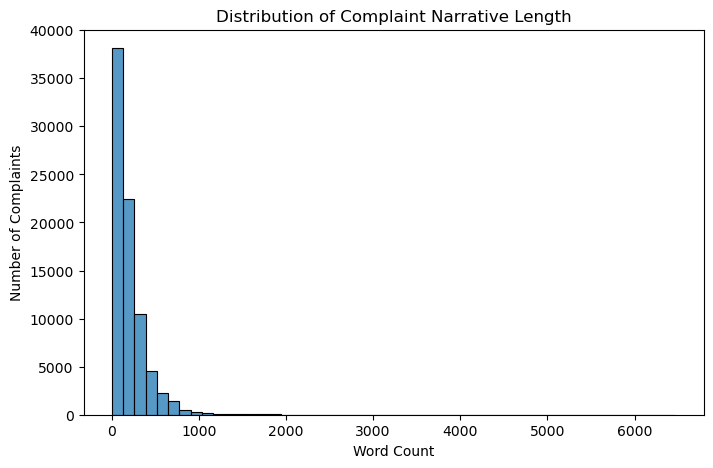

In [11]:
# Plot distribution of narrative lengths
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50)
plt.title("Distribution of Complaint Narrative Length")
plt.xlabel("Word Count")
plt.ylabel("Number of Complaints")
plt.savefig("../images/word_count_hist.png", dpi=300)
plt.show()


In [12]:
# Count per product category
df['Product'].value_counts()


Product
Credit card    80667
Name: count, dtype: int64

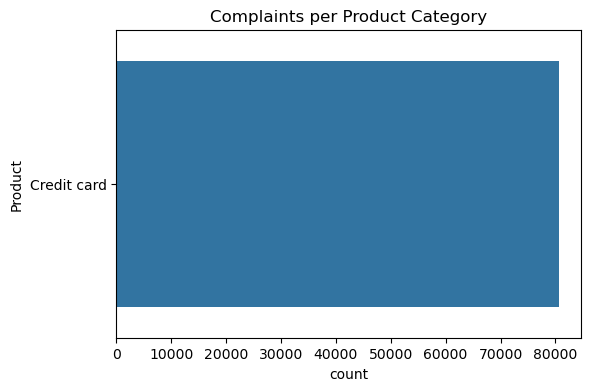

In [13]:
# Plot product distribution
plt.figure(figsize=(6,4))
sns.countplot(y=df['Product'])
plt.title("Complaints per Product Category")
plt.savefig("../images/product_distribution.png", dpi=300)
plt.show()


In [14]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    return text.strip()


In [15]:
# Apply cleaning
df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,word_count,clean_text
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,"A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unauthorized and not me. XXXX XXXX confirmed this was fraudulent and immediately closed the card. However, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by XXXX XXXX that was done by a fraudster.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91,a xxxx xxxx card was opened under my name by a fraudster i received a notice from xxxx that an account was just opened under my name i reached out to xxxx xxxx to state that this activity was unauthorized and not me xxxx xxxx confirmed this was fraudulent and immediately closed the card however they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by xxxx xxxx that was done by a fraudster
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with citibank which is changed to unsecured card and I have been calling n waitting for the check release the secured amount {$2500.00} for rhat credit card. They told me to wait then today they told me someone cashed my check but their system doesnt have info as of who, where and when did it happen!!\n\nI requested a case number but they wont send me any confirmation whatsoever to report to the police.\n\nThey told me I have to wait for some form that...",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156,dear cfpb i have a secured credit card with citibank which is changed to unsecured card and i have been calling n waitting for the check release the secured amount 250000 for rhat credit card they told me to wait then today they told me someone cashed my check but their system doesnt have info as of who where and when did it happen i requested a case number but they wont send me any confirmation whatsoever to report to the police they told me i have to wait for some form that might be sent t...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,"I have a Citi rewards cards. The credit balance issued to me was {$8400.00}. I recently moved, which meant my bills would be lowered, which meant I'd have LESS use for my credit cards. So in order to keep my usage in a generally good area I used each of my cards with the intention to pay them down monthly which would result in a boost to my credit score, showing creditors I can pay doen. All of my cards are in good standing. My credit is in good standing. But on the XXXX XXXX XXXX Citi abrup...",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233,i have a citi rewards cards the credit balance issued to me was 840000 i recently moved which meant my bills would be lowered which meant id have less use for my credit cards so in order to keep my usage in a generally good a

In [16]:
# Save cleaned dataset for Task 2
df.to_csv("../data/processed/filtered_complaints.csv", index=False)
print("Filtered and cleaned dataset saved to data/processed/filtered_complaints.csv")


Filtered and cleaned dataset saved to data/processed/filtered_complaints.csv
